In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

The three reactions to be simulated:

Polystyrene -> Styrene

Polystyrene -> Toluene

Polystyrene -> Ethylbenzene (Benzene)

Brian Lejeune/Prof. West

In [2]:
#Polystyrene Properties

PS_MW = 311600
PS_Polydisperity = 2.39
PS_Density = 1030 #kg/m^3
PS_HeatVal = 49 #MJ/kg

#Source Paper Reactor Properties

Rctr_Pressure = 10^(-1) #Pa
Rctr_TempLow = 613 #K
Rctr_TempHigh = 663 #K
Rctr_HeatRate1 = 3.33E-2
Rctr_HeatRate2 = 8.03E-2
Rctr_HeatRate3 = 1.67E-1

Rctr_Ht = 0.34 #m
Rctr_Hc = 0.205 #m
Rctr_gam = 28
Rctr_Dc = 0.123 #m
Rctr_Di = 0.02 #m
Rctr_Do = 0.01 #m

#Our Reactor Properties
Pyrocycle_T = 723.15 #K

#Kinetic Properties

PS_Ea = 83 #kJ/mol
PS_ko = 1.82E4 #s^-1

Sty_Ea = 132 #kJ/mol
Sty_ko = 5.08E7 #s^-1
Sty_mass = 104.15 # g/mol

Met_Ea = 126 #kJ/mol
Met_ko = 2.1E7 #s^-1
Met_mass = 16.04 # g/mol

Ben_Ea = 123 #kJ/mol
Ben_ko = 1.47E7 #s^-1
Ben_mass = 78.11 # g/mol

Tol_Ea = 122 #kJ/mol
Tol_ko = 1.19E7 #s^-1
Tol_mass = 92.14 # g/mol

#Constants
R = 8.314E-3 #kJ/K*mol

In [3]:
#Reaction Rate Calculations for Individual Products

def PSReaction(C_int):
    PS = C_int
    
    r = PS_ko * math.e**(-1 * PS_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def StyReaction(C_int):
    PS = C_int
    
    r = Sty_ko * math.e**(-1 * Sty_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def MetReaction(C_int):
    PS = C_int
    
    r = Met_ko * math.e**(-1 * Met_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def BenReaction(C_int):
    PS = C_int
    
    r = Ben_ko * math.e**(-1 * Ben_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def TolReaction(C_int):
    PS = C_int
    
    r = Tol_ko * math.e**(-1 * Tol_Ea/(R * Pyrocycle_T)) * PS
    
    return r

In [4]:
#Reaction Kinetics for Overall Reaction

def TotalReaction(C_array,t):
    PS = C_array[0]
    
    #Establishing Reaction Rates from initial PS feed
    
    Sty_r = StyReaction(PS)
    #Met_r = MetReaction(PS)
    Ben_r = BenReaction(PS)
    Tol_r = TolReaction(PS)
    
    #Obtaining Rate of Generation for each species
    
    dPSdt = -1 * Sty_r - Ben_r - Tol_r
    dStydt = Sty_r
    #dMetdt = Met_r
    dBendt = Ben_r
    dToldt = Tol_r
    
    return [dPSdt, dStydt, dBendt, dToldt]

In [5]:
#Integrating Overall Reaction

W_initial = [10, 0, 0, 0]
t_interval = np.linspace(0,1000)

Y_out_PS = odeint(TotalReaction, W_initial, t_interval)

In [6]:
Y_out_PS

array([[ 1.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.43898699e+00,  1.85920393e+00,  2.40377045e+00,
         2.29803862e+00],
       [ 1.18266316e+00,  2.49858175e+00,  3.23042398e+00,
         3.08833112e+00],
       [ 4.06716335e-01,  2.71846294e+00,  3.51470905e+00,
         3.36011167e+00],
       [ 1.39869228e-01,  2.79407980e+00,  3.61247432e+00,
         3.45357665e+00],
       [ 4.81008500e-02,  2.82008434e+00,  3.64609567e+00,
         3.48571914e+00],
       [ 1.65418221e-02,  2.82902727e+00,  3.65765801e+00,
         3.49677290e+00],
       [ 5.68871188e-03,  2.83210273e+00,  3.66163428e+00,
         3.50057427e+00],
       [ 1.95634090e-03,  2.83316038e+00,  3.66300172e+00,
         3.50188156e+00],
       [ 6.72782375e-04,  2.83352410e+00,  3.66347198e+00,
         3.50233114e+00],
       [ 2.31368527e-04,  2.83364919e+00,  3.66363370e+00,
         3.50248575e+00],
       [ 7.95674769e-05,  2.83369220e+00,  3.66368932e+00,
      

Text(0.5, 1.0, 'Plastic Mass vs. Time for Overall Kinetics Reaction')

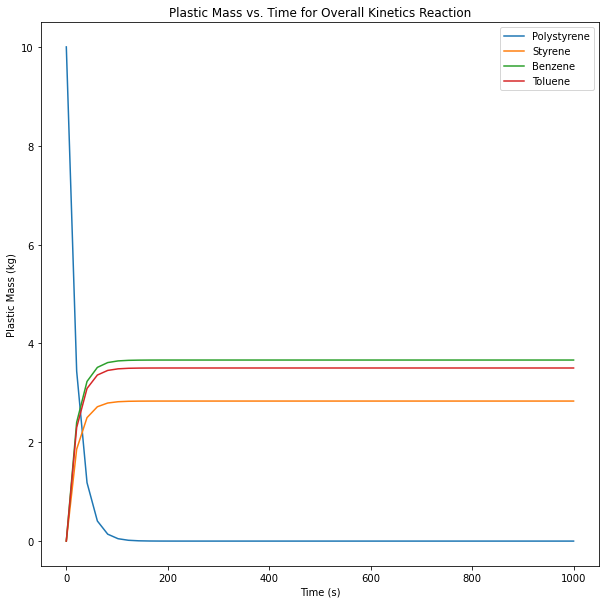

In [7]:
#Plotting the Concentrations of the Reactant and Products
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_interval, Y_out_PS)
ax.legend(['Polystyrene', 'Styrene', 'Benzene', 'Toluene'])
ax.set_ylabel('Plastic Mass (kg)')
ax.set_xlabel('Time (s)')
ax.set_title('Plastic Mass vs. Time for Overall Kinetics Reaction')